# Parte 1 - Ecuacion de difusión en 1D

Una partícula Browniana que se difunde en una caja unidimensional de 100um de ancho, empieza perfectamente localizada en el centro de la caja. La probabilidad de encontrar a la partícula en un punto $x$, después de un tiempo $t$, $P(t,x)$ está dada por la ecuación:

$$
\frac{\partial P(x,t)}{\partial t}=D\frac{\partial^2 P(x,t)}{\partial x^2}
$$

Donde $D=1$ es el coeficiente de difusión. En este ejercicio calcularemos el valor de la función de probabilidad $P(t,x)$ conforme pasa el tiempo. 

**¿Cómo puedes representar la función P(x,t) para resolver este problema?¿Cómo puedes calcular la derivada temporal y la segunda derivada espacial de la función?**

Se puede representar $P(x,t)$ como una matriz (o arreglo 2D), donde cada fila representa el estado del sistema en un instante de tiempo $t$,y cada columna representa un punto del espacio $x$. Y para calcular sus derivadas temporales usamos las expreciones sacadas de las diferencias finitas.
$$\frac{\partial P(x,t)}{\partial t}\approx \frac{P(x,t+\Delta t)-P(x,t)}{\Delta t}$$

Y la segunda derivada espacial se puede aproximar como:

$$\frac{\partial^2 P(x,t)}{\partial x^2}\approx \frac{P(x+\Delta x,t)-2P(x,t)+P(x-t\Delta x,t)}{(\Delta x)^2}$$


**Suponiendo que tienes el valor de la función en un instante de tiempo , responde lo siguiente:**
**¿Qué ecuación puedes utilizar para obtener, aproximadamente, el valor en un instante posterior, $P(t+\Delta t,x)$ ?**
**¿Qué condición existen para que esta sea una buena aproximación?**
**¿Cómo puedes implementar las condiciones iniciales y las condiciones de frontera?**

Para poder obtener el valor en un instante posterior, se puede usar el esquema de diferencias finitas (método de Euler explícito):

$$P(t+\Delta t,x)=P(t,x)+D\Delta t \cdot\frac{P(x+\delta x,t)-2P(x,t)+P(x-\Delta x,t)}{(\Delta x)^2}$$
Este método permite avanzar paso a paso en el tiempo, calculando la nueva distribución de probabilidad en función de la difusión de la anterior.

Para estabilidad del método explícito, se debe cumplir la condición de estabilidad de CFL:
$$\frac{D\Delta t}{(\Delta x)^2}\leq\frac12$$
Esto evita que los errores numéricos crezcan con el tiempo.

 

Y para la condicion inicial, la partícula está perfectamente localizada en el centro de la caja. Se puede usar una delta de Dirac aproximada como un pico (por ejemplo, poner un 1 en la celda central y ceros en el resto). Para las condiciones de frontera, como es una caja cerrada, se puede usar condiciones de frontera de tipo Dirichlet (por ejemplo, P=0 en los extremos) o Neumann (derivada espacial cero, es decir, sin flujo). En el codigo que usamos, utilizamos Dirichlet

Implementa esta ecuación de forma eficiente. Escribe abajo el código que utilizarás para realizar el cálculo.  

Utiliza la ecuación que escribiste antes para obtener el valor de la función después de 20, 40, 60 y 100 segundos. Muestra todos estos valores en una sola gráfica.  

Haz una animación de la evolución de la función durante los primeros 100 segundos. (Para realizar animaciones en jupyter, tienes que usar la función de matplotlib FuncAnimation. Puedes utilizar la función que se encuentra en este archivo animation.py Download animation.py)

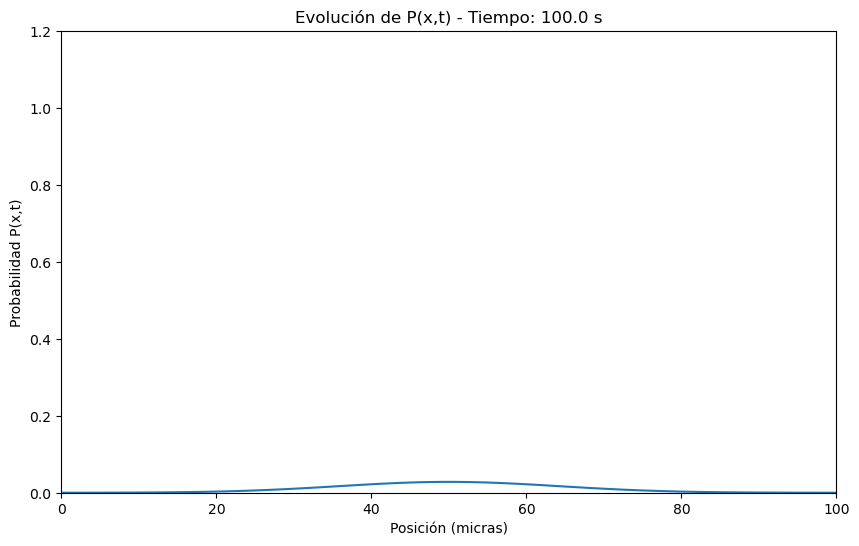

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML
# Parámetros
L = 100.0      # Longitud de la caja en micras
D = 1.0        # Coeficiente de difusión
dx = 1.0       # Paso espacial
dt = 0.4       # Paso temporal (cumple condición de estabilidad)
x = np.arange(0, L + dx, dx)
Nx = len(x)
total_time = 100
n_steps = int(total_time / dt)

# Inicialización de la distribución de probabilidad
P = np.zeros(Nx)
P[Nx // 2] = 1.0
P = P / (dx * np.sum(P))  # Normalizamos para que la integral sea ~1

# Guardamos la evolución para la animación
history = []
history.append(P.copy())

# Evolución temporal
for step in range(n_steps):
    P_new = np.copy(P)
    for i in range(1, Nx - 1):
        P_new[i] = P[i] + D * dt / dx**2 * (P[i + 1] - 2 * P[i] + P[i - 1])
    # Condiciones de frontera absorbentes
    P_new[0] = 0
    P_new[-1] = 0
    P = P_new
    history.append(P.copy())

# Configuración de la animación
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, history[0])
ax.set_xlim(0, L)
ax.set_ylim(0, max(history[0]) * 1.2)
ax.set_xlabel('Posición (micras)')
ax.set_ylabel('Probabilidad P(x,t)')
ax.set_title('Evolución de la distribución de probabilidad')

# Función que actualiza cada cuadro
def update(frame):
    line.set_ydata(history[frame])
    ax.set_title(f'Evolución de P(x,t) - Tiempo: {frame * dt:.1f} s')
    return line,

# Crear animación
anim = FuncAnimation(fig, update, frames=len(history), interval=50, blit=True)

HTML(anim.to_jshtml())
anim.save('difusion.mp4', writer='ffmpeg', fps=10)
Video("difusion.mp4")